This file contains a number of auxiliary analyses performed while processing the first EMSE review.
The general goal is to test a number of assumptions as well as calculate some demographics of the used dataset.

In [137]:
import pandas as pd
import csv
from pathlib import Path
data_path = Path(
    '../../data/development_activities/issues_sorted_started_26_05_23_min_5_prs_no_invalid_no_dupes.json').absolute()


path2 = Path('../../data/final_data/dataset_transformed.csv').absolute()
with open(path2, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)

    header = next(csv_reader)
    print(header)


df = pd.read_csv(path2)

['ID', 'Project Name', 'Submitter ID', 'PR Number', 'Closed At', 'PullRequestIsMerged', 'ControlIntegratedBySameUser', 'ControlPullRequestHasComments', 'ControlPullRequestHasCommentByExternalUser', 'ControlHasHashTagInDescription', 'IntraProjectSubmitterPullRequestSuccessRate', 'EcosystemExperienceSubmitterPullRequestSuccessRate', 'DependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'NonDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'SubmitterIsFirstTimeContributor', 'ln(1 + ControlPullRequestLifeTimeInMinutes)', 'ln(1 + ControlNumberOfCommitsInPullRequest)', 'ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)', 'ln(1 + IntraProjectSubmitterPullRequestSubmissionCount)', 'ln(1 + IntraProjectSubmitterPullRequestCommentCount)', 'ln(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + EcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + DependencyEcosystem

In [138]:
print(f"{df.shape=}")

df.head()

df.shape=(1216221, 43)


,ID,Project Name,Submitter ID,PR Number,Closed At,PullRequestIsMerged,ControlIntegratedBySameUser,ControlPullRequestHasComments,ControlPullRequestHasCommentByExternalUser,ControlHasHashTagInDescription,...,ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + NonDependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + WeightedEcosystemSecondOrderDegreeCentrality),ln(1 + WeightedIntraProjectSecondOrderDegreeCentrality),ln(1 + EcosystemLinkIntensity),ln(1 + IntraProjectLinkIntensity)
0,166078092,0xProject/0x-monorepo,1141340,352,2018-02-07T00:15:26Z,True,True,True,True,True,...,0.0,0.0,0.089382,0.077533,0.0,0.0,0.012052,0.161812,0.0,0.000000
1,250614858,0xProject/0x-monorepo,4369805,1587,2019-02-06T10:23:21Z,True,False,True,True,True,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.049564,0.0,0.046636
2,320531534,0xProject/0x-monorepo,8582774,2193,2019-10-07T18:29:34Z,False,True,True,True,True,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.083034,0.0,0.000000
3,144650071,0xProject/0x-monorepo,6204356,181,2017-10-05T06:47:55Z,True,True,True,True,False,...,0.0,0.0,0.141667,0.077533,0.0,0.0,0.060473,0.117866,0.0,0.000000
4,235634715,0xProject/0x-monorepo,210914,1371,2018-12-05T01:20:59Z,True,True,True,True,True,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.225033,0.0,0.000000


## Question 1: Contributor skewness

To how many different projects do high-performing ecosystem developers contribute?

submissions_per_user.shape=(190563,)


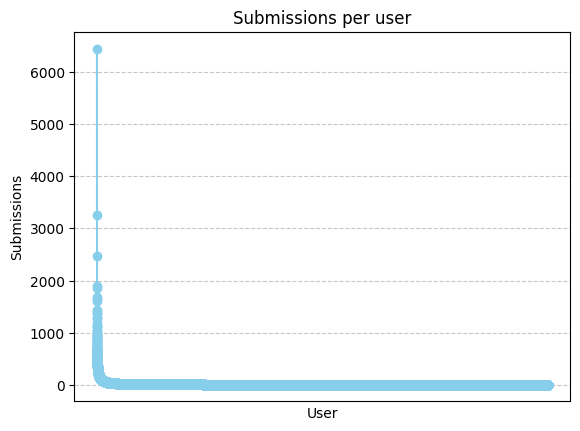

In [139]:
import matplotlib.pyplot as plt

eco_fields = [col for col in df.columns if 'Ecosystem' in col]
eco_devs = df[(df[eco_fields].sum(axis=1) > 0)]
# There is some error here as the first project they contributed to is missing from this set.
# This doesn't matter, though, as we're only using people with a "huge number of projects committed to".

submissions_per_user = df['Submitter ID'].value_counts()
print(f'{submissions_per_user.shape=}')

plt.plot(submissions_per_user.values, marker='o',
         color='skyblue', linestyle='-')
plt.title('Submissions per user')
plt.ylabel('Submissions')
plt.xlabel('User')
plt.xticks(ticks=[])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

So, even in the subsampled dataset, there are a couple of users with a huge number of PRs.

In [140]:
qdf = df.groupby('Submitter ID')
number_of_projects = qdf['Project Name'].unique().apply(len)

Submitter ID
8518239     780
557895      297
947110      292
6374832     290
827205      281
           ... 
2311075       1
2310795       1
2310703       1
2310694       1
59734442      1
Name: Project Name, Length: 190563, dtype: int64


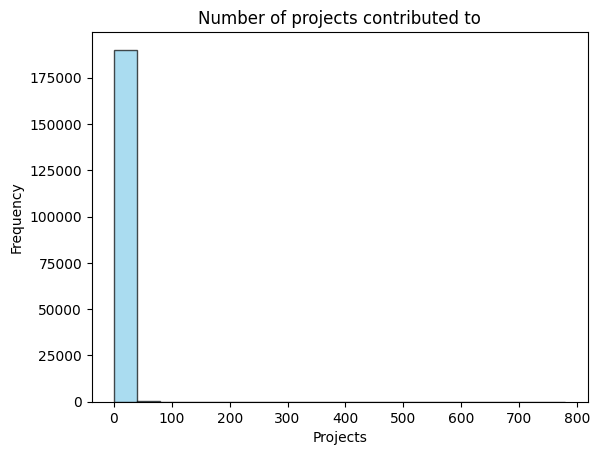

In [141]:
print(number_of_projects.sort_values(ascending=False))


def my_hist(number_of_projects):

    plt.hist(number_of_projects, bins=20, color='skyblue',
             edgecolor='black', alpha=0.7)
    plt.title('Number of projects contributed to')
    plt.xlabel('Projects')
    plt.ylabel('Frequency')
    plt.show()


my_hist(number_of_projects)

And a number of developers have contributed to a huge number of ecosystem projects.

threshold=300
Preserved 1215383/1216221 PRs (99.93%)
Preserved 190562/190563 users (100.00%)


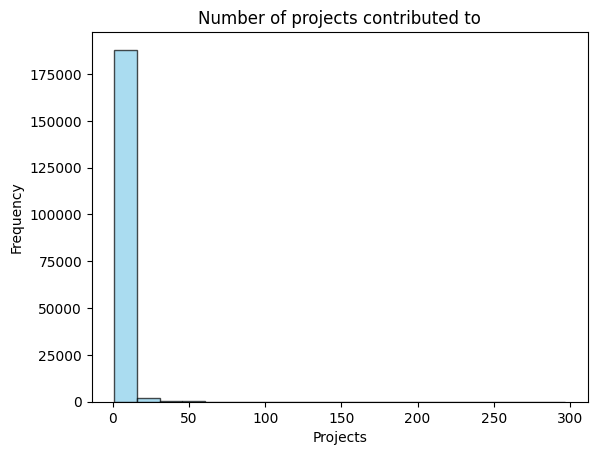

threshold=60
Preserved 1130115/1216221 PRs (92.92%)
Preserved 190355/190563 users (99.89%)


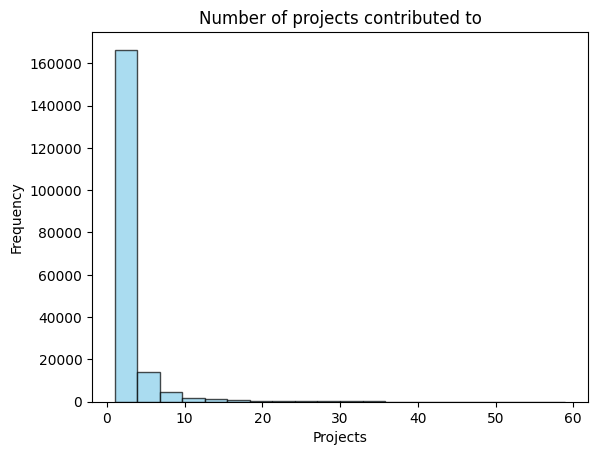

threshold=20
Preserved 938394/1216221 PRs (77.16%)
Preserved 188808/190563 users (99.08%)


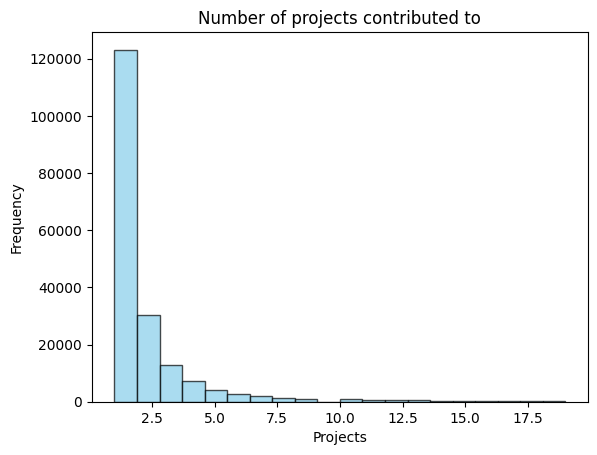

In [142]:
for threshold in [300, 60, 20]:
    print(f'{threshold=}')
    my_number_of_projects = number_of_projects[number_of_projects < threshold]

    my_df = df[df['Submitter ID'].isin(my_number_of_projects.index)]
    my_df_perc = my_df.shape[0] / df.shape[0] * 100
    my_users_perc = my_number_of_projects.shape[0] / number_of_projects.shape[0] * 100
    print(f'Preserved {my_df.shape[0]}/{df.shape[0]} PRs ({my_df_perc:.2f}%)')
    print(f'Preserved {my_number_of_projects.shape[0]}/{number_of_projects.shape[0]} users ({my_users_perc:.2f}%)')

    my_hist(my_number_of_projects)

### Answer 
So, the top contributors are responsible for a differing number of PRs.
Depending on the definition of a "top contributor" in terms of the number of projects contributed to, the top **<1% to 1%** are responsible for **<1% to 23%** of the PRs in the dataset.

### Follow-up Question A: Impact

*Does removing top contributors from the dataset affect the outcomes for the ME logit model?*

*For simplicity of the test, I make a number of assumptions:*
- Multicollinearity is the same
- log linearity is the same

Realistically, this all needs to be checked.

#### Ecosystem model

In [175]:
import statsmodels.api as sm
import scipy
import numpy as np
from python_proj.utils.util import get_matching

from wmutils.pandas.transforms import min_max_scale
from statsmodels.regression.mixed_linear_model import MixedLM


def do_lr_pipeline(feature_regex: str, multicollinear_fields: list, threshold: int = 20):
    """
    I built this make-shift pipeline to simplify running the Logit models.
    It's basically a concatenation of the original NBs, but makes the above-stated assumptions.

    The default "top contributor" threshold is 20; this is pretty aggressive.
    """

    my_number_of_projects = number_of_projects[number_of_projects < threshold]
    my_df = df[df['Submitter ID'].isin(my_number_of_projects.index)]

    print(f'{my_df.shape=}')

    metadata_fields = ["ID", "Project Name",
                       "Submitter ID", "PR Number", "Closed At"]
    pr_merged_key = "PullRequestIsMerged"
    dependent_fields = [pr_merged_key]

    independent_fields = [
        field
        for field in my_df.columns
        if (field not in metadata_fields and field not in dependent_fields)
    ]

    # Identifies the to-be-dropped features

    has_dependency_no_otheers_pattern = (
        feature_regex
    )
    dropped_fields = list(
        get_matching(independent_fields, has_dependency_no_otheers_pattern)
    )

    print(f"{len(dropped_fields)=}")
    print(f"{dropped_fields=}")

    # Drops the selected features

    my_df = my_df.drop(dropped_fields, axis=1)
    independent_fields = [
        field for field in independent_fields if field not in dropped_fields
    ]

    print(f"{len(my_df.columns)=}")
    my_df.describe()

    print(
        f"Removing {len(multicollinear_fields)} / {len(independent_fields)} fields to account for multicollinearity."
    )

    # Drops fields.
    logit_df = my_df[independent_fields].drop(multicollinear_fields, axis=1)

    print(f"{len(logit_df)=}")
    print(f"{len(logit_df.columns)=}")
    print(f"{logit_df.columns=}")

    # Replaces binary values with numeric variants so VIF can be calculated.

    value_mapper = {False: 0, True: 1}

    binary_fields = logit_df.select_dtypes(exclude="number")
    print(f"{len(binary_fields.columns)=}")
    for feature in binary_fields:
        logit_df[feature] = logit_df[feature].replace(value_mapper)

    X_constant = sm.add_constant(logit_df)

    # Use GLM method for logreg here so that we can retrieve the influence measures
    logit_results = sm.GLM(
        my_df[pr_merged_key], X_constant, family=sm.families.Binomial()
    ).fit()

    # Get influence measures
    influence = logit_results.get_influence()

    # Obtain summary df of influence measures
    summ_df = influence.summary_frame()

    # Filter summary df to Cook's distance values only
    diagnosis_df = summ_df[["cooks_d"]]

    # Set Cook's distance threshold
    cook_threshold = 4 / len(logit_df)

    # Append absolute standardized residual values
    diagnosis_df["std_resid"] = scipy.stats.zscore(logit_results.resid_pearson)
    diagnosis_df["std_resid"] = diagnosis_df["std_resid"].apply(
        lambda x: np.abs(x))

    # Find observations which are BOTH outlier (std dev > 3) and highly influential
    extreme = diagnosis_df[
        (diagnosis_df["cooks_d"] > cook_threshold) & (
            diagnosis_df["std_resid"] > 3)
    ]

    # Show top 5 highly influential outlier observations
    extreme.sort_values("cooks_d", ascending=False).head(10)

    logit_df = logit_df.drop(extreme.index)
    tested_dependents = my_df[pr_merged_key].drop(extreme.index)

    print(f"{len(logit_df)=}")
    print(f"{my_df.shape=}")

    # Re-scales the data to account for removed outliers.
    tested_numeric_predictors = [
        col
        for col in logit_df.select_dtypes(include="number").columns
        if col not in metadata_fields
    ]
    logit_df = min_max_scale(logit_df, tested_numeric_predictors)

    # Selects relevant project names.
    pn_key = "Project Name"
    tested_projects = df[pn_key].copy()
    tested_projects = tested_projects[logit_df.index]

    # Creates model.
    mixed_model = MixedLM(
        tested_dependents,
        logit_df,
        tested_projects,
    ).fit()

    mixed_model.summary()
    return mixed_model

#### Ecosystem model


In [176]:
eco_feat_regex = r"(.*(?=Dependency).*|.*Weighted.*|.*LinkIntensity.*)"
eco_multicollinear_fields = [
    # Confounds
    "ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)",
    # eco
    "EcosystemExperienceSubmitterPullRequestSuccessRate",
    "ln(1 + EcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + EcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + EcosystemExperienceSubmitterIssueCommentCount)",
    # intra-proj
    # "ln(1 + IntraProjectSubmitterIssueSubmissionCount)",
    "ln(1 + IntraProjectSubmitterPullRequestSubmissionCount)",
    "IntraProjectSubmitterPullRequestSuccessRate",
    "ln(1 + IntraProjectSubmitterPullRequestCommentCount)",
    "ln(1 + IntraProjectSubmitterIssueCommentCount)",
]

eco_model = do_lr_pipeline(eco_feat_regex, eco_multicollinear_fields)
eco_model.summary()


my_df.shape=(938394, 43)
len(dropped_fields)=19
dropped_fields=['DependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'NonDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + NonDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + NonDependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount)', 'ln(1 + NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount)', 'ln(1 + NonDependencyEcosystemExperienceSubmitterIssue

/tmp/ipykernel_92471/2657352043.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df["std_resid"] = scipy.stats.zscore(logit_results.resid_pearson)
/tmp/ipykernel_92471/2657352043.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df["std_resid"] = diagnosis_df["std_resid"].apply(


len(logit_df)=921124
my_df.shape=(938394, 24)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Mixed Linear Model Regression Results
===========================================================================================================
Model:                          MixedLM               Dependent Variable:               PullRequestIsMerged
No. Observations:               921124                Method:                           REML               
No. Groups:                     19356                 Scale:                            0.1108             
Min. group size:                1                     Log-Likelihood:                   -345502.8217       
Max. group size:                688                   Converged:                        Yes                
Mean group size:                47.6                                                                       
-----------------------------------------------------------------------------------------------------------
                                                               Coef.  Std.Err.    z     P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------------------------
ControlIntegratedBySameUser                                    -0.299    0.001 -313.850 0.000 -0.301 -0.297
ControlPullRequestHasComments                                  -0.130    0.001 -131.707 0.000 -0.132 -0.128
ControlPullRequestHasCommentByExternalUser                      0.029    0.001   27.803 0.000  0.027  0.031
ControlHasHashTagInDescription                                  0.039    0.001   47.097 0.000  0.038  0.041
SubmitterIsFirstTimeContributor                                -0.132    0.001 -140.158 0.000 -0.134 -0.130
ln(1 + ControlPullRequestLifeTimeInMinutes)                    -0.470    0.002 -244.066 0.000 -0.473 -0.466
ln(1 + ControlNumberOfCommitsInPullRequest)                     0.150    0.005   28.609 0.000  0.140  0.160
ln(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount)  0.251    0.003   84.756 0.000  0.245  0.256
ln(1 + IntraProjectSubmitterIssueSubmissionCount)               0.290    0.004   77.593 0.000  0.282  0.297
Group Var                                                       1.399    0.045                             
===========================================================================================================

"""

#### Collaboration model

Evaluates the previously posed question for the collaboration model.

In [173]:
coll_feat_regex = r"^(?!.*(?:LinkIntensity|DegreeCentrality))(?=.*Ecosystem).*"
coll_multicollinear_fields = [
    # Confounding factor
    "ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)",
    # Correlating Controls
    # "ControlIntegratedBySameUser",
    # "ControlPullRequestHasComments",
    # Intra link intensity
    "ControlIntegratedBySameUser",
    "ln(1 + IntraProjectLinkIntensity)",
    # Intra experience
    "IntraProjectSubmitterPullRequestSuccessRate",
    "SubmitterIsFirstTimeContributor",
    "ln(1 + IntraProjectSubmitterIssueCommentCount)",
    # "ln(1 + IntraProjectSubmitterIssueSubmissionCount)",
    "ln(1 + IntraProjectSubmitterPullRequestCommentCount)",
    "ln(1 + IntraProjectSubmitterPullRequestSubmissionCount)",
    "ln(1 + WeightedIntraProjectSecondOrderDegreeCentrality)",
]

coll_model = do_lr_pipeline(coll_feat_regex, coll_multicollinear_fields)
coll_model.summary()

my_df.shape=(938394, 43)
len(dropped_fields)=20
dropped_fields=['EcosystemExperienceSubmitterPullRequestSuccessRate', 'DependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'NonDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'ln(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + EcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + NonDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + NonDependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + EcosystemExperienceSubmitterIssueSubmissionCount)', 'ln(1 + EcosystemExpe

/tmp/ipykernel_92471/2153574785.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df["std_resid"] = scipy.stats.zscore(logit_results.resid_pearson)
/tmp/ipykernel_92471/2153574785.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df["std_resid"] = diagnosis_df["std_resid"].apply(


len(logit_df)=919864
my_df.shape=(938394, 23)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Mixed Linear Model Regression Results
=================================================================================================
Model:                        MixedLM           Dependent Variable:           PullRequestIsMerged
No. Observations:             919864            Method:                       REML               
No. Groups:                   19347             Scale:                        0.1212             
Min. group size:              1                 Log-Likelihood:               -382094.9524       
Max. group size:              688               Converged:                    Yes                
Mean group size:              47.5                                                               
-------------------------------------------------------------------------------------------------
                                                     Coef.  Std.Err.    z     P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------------
ControlPullRequestHasComments                        -0.117    0.001 -115.501 0.000 -0.119 -0.115
ControlPullRequestHasCommentByExternalUser           -0.012    0.001  -11.391 0.000 -0.014 -0.010
ControlHasHashTagInDescription                        0.044    0.001   50.998 0.000  0.043  0.046
ln(1 + ControlPullRequestLifeTimeInMinutes)          -0.401    0.002 -204.132 0.000 -0.405 -0.397
ln(1 + ControlNumberOfCommitsInPullRequest)           0.072    0.005   13.219 0.000  0.061  0.083
ln(1 + IntraProjectSubmitterIssueSubmissionCount)     0.208    0.004   55.111 0.000  0.201  0.215
ln(1 + WeightedEcosystemSecondOrderDegreeCentrality)  0.122    0.005   23.291 0.000  0.112  0.132
ln(1 + EcosystemLinkIntensity)                        0.422    0.008   54.027 0.000  0.407  0.437
Group Var                                             1.008    0.031                             
=================================================================================================

"""

#### Dependency model

Evaluates the posedd question on the dependency model.

In [174]:
dep_feat_regex = r"^(?:(?!Dependency|Control|IntraProject(?!LinkIntensity|SecondOrder)|SubmitterIsFirstTimeContributor).)*$"
dep_multicollinear_fields = [
    # Confounds
    "ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)",
    # # dep
    "DependencyEcosystemExperienceSubmitterPullRequestSuccessRate",
    "ln(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount)",
    # Inv. dep
    "InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate",
    "ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueCommentCount)",
    # non-dep
    "NonDependencyEcosystemExperienceSubmitterPullRequestSuccessRate",
    "ln(1 + NonDependencyEcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + NonDependencyEcosystemExperienceSubmitterIssueCommentCount)",
    # intra-proj
    "IntraProjectSubmitterPullRequestSuccessRate",
    "ln(1 + IntraProjectSubmitterPullRequestSubmissionCount)",
    "ln(1 + IntraProjectSubmitterPullRequestCommentCount)",
    "ln(1 + IntraProjectSubmitterIssueCommentCount)",
]

dep_model = do_lr_pipeline(dep_feat_regex, dep_multicollinear_fields)
dep_model.summary()

my_df.shape=(938394, 43)
len(dropped_fields)=9
dropped_fields=['EcosystemExperienceSubmitterPullRequestSuccessRate', 'ln(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + EcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + EcosystemExperienceSubmitterIssueSubmissionCount)', 'ln(1 + EcosystemExperienceSubmitterIssueCommentCount)', 'ln(1 + WeightedEcosystemSecondOrderDegreeCentrality)', 'ln(1 + WeightedIntraProjectSecondOrderDegreeCentrality)', 'ln(1 + EcosystemLinkIntensity)', 'ln(1 + IntraProjectLinkIntensity)']
len(my_df.columns)=34
Removing 17 / 28 fields to account for multicollinearity.
len(logit_df)=938394
len(logit_df.columns)=11
logit_df.columns=Index(['ControlIntegratedBySameUser', 'ControlPullRequestHasComments',
       'ControlPullRequestHasCommentByExternalUser',
       'ControlHasHashTagInDescription', 'SubmitterIsFirstTimeContributor',
       'ln(1 + ControlPullRequestLifeTimeInMinutes)',
       'ln(1 + ControlNumberOfCommitsInPullRequest)',


/tmp/ipykernel_92471/2153574785.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df["std_resid"] = scipy.stats.zscore(logit_results.resid_pearson)
/tmp/ipykernel_92471/2153574785.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df["std_resid"] = diagnosis_df["std_resid"].apply(


len(logit_df)=921601
my_df.shape=(938394, 34)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                            Mixed Linear Model Regression Results
=============================================================================================================================
Model:                                MixedLM                     Dependent Variable:                     PullRequestIsMerged
No. Observations:                     921601                      Method:                                 REML               
No. Groups:                           19356                       Scale:                                  0.1111             
Min. group size:                      1                           Log-Likelihood:                         -346725.1052       
Max. group size:                      688                         Converged:                              Yes                
Mean group size:                      47.6                                                                                   
-----------------------------------------------------------------------------------------------------------------------------
                                                                                 Coef.  Std.Err.    z     P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------------------------------------------
ControlIntegratedBySameUser                                                      -0.299    0.001 -313.386 0.000 -0.301 -0.297
ControlPullRequestHasComments                                                    -0.129    0.001 -131.292 0.000 -0.131 -0.127
ControlPullRequestHasCommentByExternalUser                                        0.028    0.001   27.428 0.000  0.026  0.030
ControlHasHashTagInDescription                                                    0.039    0.001   47.310 0.000  0.038  0.041
SubmitterIsFirstTimeContributor                                                  -0.131    0.001 -139.713 0.000 -0.133 -0.130
ln(1 + ControlPullRequestLifeTimeInMinutes)                                      -0.468    0.002 -242.760 0.000 -0.471 -0.464
ln(1 + ControlNumberOfCommitsInPullRequest)                                       0.150    0.005   28.628 0.000  0.140  0.160
ln(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)          0.177    0.007   26.776 0.000  0.164  0.190
ln(1 + NonDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)       0.224    0.003   71.712 0.000  0.218  0.230
ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)  0.120    0.008   15.488 0.000  0.105  0.136
ln(1 + IntraProjectSubmitterIssueSubmissionCount)                                 0.289    0.004   77.356 0.000  0.282  0.296
Group Var                                                                         1.399    0.044                             
=============================================================================================================================

"""

### Answer

We compare with the results shown [here](python_proj/modelling/notebooks/logistic_regression/general/).


#### Ecosystem model

Overall, the results are the same.
The errors remain unchanged.
I observe the following differences in coefficients (which changed more than 0.01):
- self-integrated went from -0.262 to -0.299 (i.e., -0.037)
- pr age went from -0.482 to -0.470 (+0.012)
- commit count went from 0.189 to 0.150 (+0.039)
- intra contributiosn went from 0.272 to 0.290 (+0.018)

The order of intra vs ecosystem remains unchanged.
Most differences regard the control variables, which are not the subject of study.
The order of intra vs. ecosystem contributions remains the same, and the ballpark percentage of intra-project contributions remains the same too.
In conclusion, I would argue that the impact is minimal, thus **not warranting a change to the methodology**.

Because the definition of "top ecosystem contributor" was pretty tight in this experiment already (dropping 23% of the PRs) and the impact is minimal, there is no need to explore with weaker definitions as these would only converge towards the original results.


#### Dependency model

Generally, the results are the same again. We can see the following coefficient changes:
- self integrated changed from -0.261 tot -0.299 (-0.038)
- pr age went from -0.478 to -0.468 (+0.01)
- commits went from 0.186 to 0.15 (-0.036)
- downstream went from 0.128 to 0.177 (+0.049)
- upstream went from 0.097 to 0.120 (+0.023)
- intra went from 0.274 to 0.289 (+0.015)

Quite some variables changed at least 1pp in their coefficients.
Although these changes, the relationships across variables remains the same.
Interestingly, the impact of the ecosystem variables only went up, but the standard error only went up slightly as well for these features.

Although the numbers changed slightly, the conclusions haven't. For which I'd argue there is only minor support for changing the method.


#### Collaboration model

Generally, the results are the same again, but we can see the following differences:
- pr lifetimechanged from -0.435 to -0.401 (+0.034)
- commits went from 0.124 to 0.072 (-0.052)
- so-degree went from 0.167 to 0.122 (-0.045)
- link strength went from 0.322 to 0.422 (+0.1)

Again, the conclusions don't change, as the order across coefficients and significances haven't changed.
The difference here is quite substantial, though, such that the gap between so-degree and link strength became quite large, increasing 14.5pp, such that so-degree became less important and link strenght became even more important. This is extra interesting because this is the general model, which doesn't emphasize (non-)newcomers yet. This gives quite strong support to alter the method.


#### General conclusions

From the ecosystem and dependency models, there is little support to change the model, as the coefficients do not change substantially (at best 5pp), and the order among variables does not change either.
In principle these two points hold for the collaboration model as well, however, the gap between so-degree and link strength changed quite substantially (15pp) where so-degree decreased with 5pp and link strength increased with 10pp.
This is a meaningful result, however, I also think we can get away with just mentioning it as an auxiliary result. This could be summarized along the lines of *"One might want to account for individuals that are highly active in the ecosystem, which might affect the results. However, after exploring its effect, removing these individuals, generally yielded very similar results, such that the coefficients never changed more than 5pp. One result does stand out, however, as direct collaboration increased by 10pp, which community standing decreased by 5pp. This emphasizes the importance of direct collaboration even further."*
